In [1]:
!pip install imageio matplotlib absl-py==1.4.0 astunparse==1.6.3 cachetools==4.2.4 charset-normalizer==2.1.1 gast==0.3.3 google-auth==1.35.0 google-auth-oauthlib==0.4.6 google-pasta==0.2.0 grpcio==1.51.1 h5py==2.10.0 idna==3.4 importlib-metadata==6.0.0 keras-preprocessing==1.1.2 lxml==4.9.2 markdown==3.4.1 markupsafe==2.1.1 numpy==1.19.5 oauthlib==3.2.2 opt-einsum==3.3.0 protobuf==3.20.1 pyasn1==0.4.8 pyasn1-modules==0.2.8 requests==2.28.1 requests-oauthlib==1.3.1 rsa==4.9 scipy==1.4.1 tensorboard==2.2.2 tensorboard-plugin-wit==1.8.1 tensorflow==2.2.0 tensorflow-estimator==2.2.0 termcolor==2.2.0 tqdm==4.64.1 urllib3==1.26.14 werkzeug==2.2.2 wrapt==1.14.1 zipp==3.11.0 opencv-python==4.7.0.68 gdown==4.6.0

In [2]:
%mkdir data
%pip install wget
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights

mkdir: cannot create directory ‘data’: File exists
Note: you may need to restart the kernel to use updated packages.
--2023-01-30 02:14:40--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  12.1MB/s    in 20s     

2023-01-30 02:15:01 (11.7 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]



In [3]:
!python convert.py --weights ./data/yolov3.weights --output ./checkpoints/yolov3.tf

2023-01-30 02:15:03.721555: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-01-30 02:15:03.863747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 02:15:03.866196: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.62GiB deviceMemoryBandwidth: 298.08GiB/s
2023-01-30 02:15:03.866605: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-30 02:15:03.866674: W tensorflow/stream_executor/plat

In [4]:
!gdown https://drive.google.com/drive/folders/1DTLqPKm-eypYlyD54s-sEkcL-yGCPsyo?usp=share_link --folder -O ./brain_dataset

Retrieving folder list
Processing file 1Sq0bph5QJE5U_x-qu8hUcjgiTONeBDy1 axial_brain_train.tfrecord
Processing file 172vMkaGKkol2x1juNzjWdEwNZrTyZnvz axial_brain_val.tfrecord
Retrieving folder 1-C3N6h-CtdojHjEyFvXGXBorDFBo_k4z checkpoint
Processing file 1r-To0qDDIjCH8WlDzHwIojtv7dYsv8p7 axial_ckpt.tf.data-00000-of-00001
Processing file 1q-Ooi8MUBh-XtGDAOq0qU7HRDpdztOAN axial_ckpt.tf.index
Processing file 1JKTklP1j65a4S10kXkC68matY-vcwH9D class.txt
Processing file 13PzBr8jBjHdt4VMaEcEOkMoCF6VKpmx1 test_input_0.jpg
Processing file 1guMwF8yC_2uPpvE60z6RkgqaLwb0a0BY test_input_1.jpg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Sq0bph5QJE5U_x-qu8hUcjgiTONeBDy1
To: /home/jovyan/matilda-platform-demo/brain_dataset/axial_brain_train.tfrecord
100%|██████████████████████████████████████| 2.91M/2.91M [00:00<00:00, 11.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=172vMkaGKkol2x

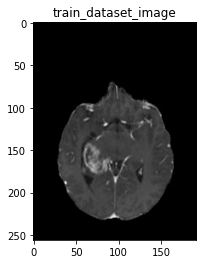

In [5]:
import cv2
image = cv2.imread("./brain_dataset/test_input_1.jpg")

from matplotlib import pyplot as plt
plt.imshow(image)
plt.title('train_dataset_image')
plt.show()

In [6]:
!python train.py \
    --names brain \
    --batch_size 8 \
    --dataset ./brain_dataset/axial_brain_train.tfrecord  \
    --val_dataset ./brain_dataset/axial_brain_val.tfrecord \
    --epochs 2 --size 256 \
    --classes ./brain_dataset/class.txt \
    --num_classes 2 \
    --mode eager_tf \
    --transfer darknet \
    --weights ./checkpoints/yolov3.tf \
    --output ./brain_tumor_model \
    --weights_num_classes 80

2023-01-30 02:15:38.633050: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-01-30 02:15:38.773666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-30 02:15:38.776070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.62GiB deviceMemoryBandwidth: 298.08GiB/s
2023-01-30 02:15:38.776527: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.8/site-packages/cv2/../../lib64:/opt/conda/lib/python3.8/site-packages/cv2/../../lib64:
2023-0